In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import torch
import torchvision
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
from mdistiller.mdistiller.dataset.imagenet import get_imagenet_dataloaders

In [2]:
# Assuming the get_imagenet_dataloaders function and necessary imports are defined
batch_size = 32  # You can adjust this based on your system's memory
val_batch_size = 32
num_workers = 4  # Adjust based on your machine's capabilities

train_loader, test_loader, num_data = get_imagenet_dataloaders(batch_size, val_batch_size, num_workers)


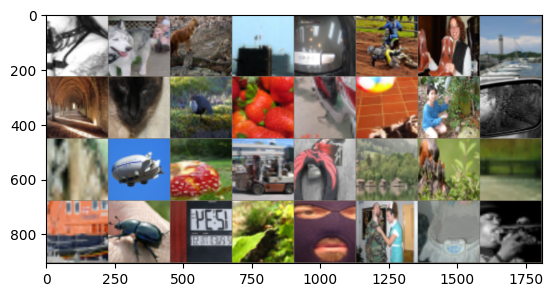

In [6]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Get a batch of training data
images,labels,_ = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(images)
imshow(out, None)

In [10]:
len(xx)

3

In [10]:
images[0]

tensor([[[ 2.2489,  2.2489,  2.2489,  ...,  1.6838,  1.6838,  1.6838],
         [ 2.2489,  2.2489,  2.2489,  ...,  1.6838,  1.6838,  1.6838],
         [ 2.2489,  2.2489,  2.2489,  ...,  1.6838,  1.6838,  1.6838],
         ...,
         [ 2.1462,  2.1462,  2.1462,  ..., -0.4568, -0.4568, -0.4568],
         [ 2.1462,  2.1462,  2.1462,  ..., -0.4568, -0.4568, -0.4568],
         [ 2.1462,  2.1462,  2.1462,  ..., -0.4568, -0.4568, -0.4568]],

        [[ 2.4286,  2.4286,  2.4286,  ...,  1.8508,  1.8508,  1.8508],
         [ 2.4286,  2.4286,  2.4286,  ...,  1.8508,  1.8508,  1.8508],
         [ 2.4286,  2.4286,  2.4286,  ...,  1.8508,  1.8508,  1.8508],
         ...,
         [ 2.3235,  2.3235,  2.3235,  ..., -0.3375, -0.3375, -0.3375],
         [ 2.3235,  2.3235,  2.3235,  ..., -0.3375, -0.3375, -0.3375],
         [ 2.3235,  2.3235,  2.3235,  ..., -0.3375, -0.3375, -0.3375]],

        [[ 2.6400,  2.6400,  2.6400,  ...,  2.0648,  2.0648,  2.0648],
         [ 2.6400,  2.6400,  2.6400,  ...,  2

In [19]:
from PIL import Image
import numpy as np

# Open an example PNG image
image_path = "/projectnb/textconv/distill/mdistiller/data/imagenet/train/243/113260.png"  # Replace this with the path to your image
image = Image.open(image_path)
image_array = np.array(image)

print("Max pixel value:", image_array.max())
print("Min pixel value:", image_array.min())

# Show the image
image.show()

Max pixel value: 254
Min pixel value: 8


/bin/xdg-open: line 862: www-browser: command not found
/bin/xdg-open: line 862: links2: command not found
/bin/xdg-open: line 862: elinks: command not found
/bin/xdg-open: line 862: links: command not found
/bin/xdg-open: line 862: lynx: command not found
/bin/xdg-open: line 862: w3m: command not found
xdg-open: no method available for opening '/scratch/7104204.1.ece/tmpjvh58ea9.PNG'


In [18]:
image_array.shape  ##i think this is the downsampled one fuck god

(64, 64, 3)

In [20]:
import os
from PIL import Image
import numpy as np
from collections import defaultdict

# Path to the imagenet training data
base_path = "/projectnb/textconv/distill/mdistiller/data/imagenet/train/"

# Dictionary to hold the count of each image shape
shape_counts = defaultdict(int)

# Loop through each subdirectory in the base path
for subdir in os.listdir(base_path):
    subdir_path = os.path.join(base_path, subdir)
    if os.path.isdir(subdir_path):
        # List the first 10 PNG image files in this directory
        files = [f for f in os.listdir(subdir_path) if f.endswith('.png')][:10]
        for file in files:
            file_path = os.path.join(subdir_path, file)
            try:
                # Open the image and convert to a numpy array
                image = Image.open(file_path)
                image_array = np.array(image)
                # Record the shape of the image
                shape_counts[image_array.shape] += 1
            except Exception as e:
                print(f"Failed to process {file_path}: {e}")

# Print the count of each shape
for shape, count in shape_counts.items():
    print(f"Shape: {shape}, Count: {count}")


Shape: (64, 64, 3), Count: 10000


In [1]:
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the dataset
dataset = load_dataset('imagenet-1k')

# Function to show images with labels
def show_images(dataset, num_images=5):
    plt.figure(figsize=(15, 10))
    for i, example in enumerate(dataset['train'].take(num_images)):
        image = example['image']
        label = example['label']
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

# Call the function to display images
show_images(dataset)


KeyboardInterrupt: 